In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data

On récupère toutes les données proposés:

In [3]:
court = pd.read_csv('courts.csv')
facts_atp = pd.read_csv('facts_atp.csv')
games_atp = pd.read_csv('games_atp.csv',parse_dates=['DATE_G'])
games_atp_public = pd.read_csv('games_atp_public.csv',parse_dates=['DATE_G'])
players_atp = pd.read_csv('players_atp.csv')
ratings_atp = pd.read_csv('ratings_atp.csv',parse_dates=['DATE_R'])
rounds = pd.read_csv('rounds.csv')
stat_atp = pd.read_csv('stat_atp.csv')
tours_atp = pd.read_csv('tours_atp.csv')


/home/gozuslayer/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,CLAYTOUR_P,GRASSPOINT_P,GRASSTOUR_P,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
count,55562.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,1.733000e+03,100.00000,900.000000,900.000000,900.000000,900.000000,900.000000,1.560600e+04
mean,28455.347234,450.500000,-9.000000,279.860000,114.978889,9.444444,96.476667,10.631111,23.342222,0.83000,2.242222,0.460000,9.458405e+05,1299.89000,450.471111,2.346667,413.452222,36.327778,2.640000,9.887677e+07
std,16386.667843,259.951919,97.406479,761.454793,415.014591,6.696854,239.013421,7.832900,115.513501,1.39321,8.970300,1.032056,4.393559e+06,1430.44102,259.935023,40.034021,911.129961,120.976553,2.933706,1.049976e+07
min,1.000000,1.000000,-1000.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.001100e+04,513.00000,1.000000,-262.000000,37.000000,0.000000,0.000000,1.000047e+07
25%,14167.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28666.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,42665.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,56671.000000,900.000000,183.000000,14040.000000,9045.000000,40.000000,3200.000000,32.000000,2000.000000,7.00000,100.000000,8.000000,9.730356e+07,10240.00000,900.000000,510.000000,8090.000000,1750.000000,14.000000,1.003420e+08


In [6]:
df = pd.merge(games_atp,players_atp[['ID_P','RANK_P','POINT_P']],how='left',left_on='ID1_G',right_on='ID_P')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Data columns (total 9 columns):
ID1_G       84485 non-null int64
ID2_G       84485 non-null int64
ID_T_G      84485 non-null int64
ID_R_G      84485 non-null int64
RESULT_G    84485 non-null object
DATE_G      84485 non-null datetime64[ns]
ID_P        84485 non-null int64
RANK_P      56595 non-null float64
POINT_P     56595 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 6.4+ MB


# Discovering the data

Avant de s'attaquer directement au problème de prédiction, on observe les données pour leur donner du sens. Il s'agit ici de faire un premier passage sur les données afin de mieux les comprendre. Une fois la compréhension faite, on procède à la feature extraction pour notre problème. 

## Court.csv

Le premier fichier est "court.csv". Voici son contenu:

In [3]:
#affichage du head
court.head()

,ID_C,NAME_C
0,1,Hard
1,2,Clay
2,3,I.hard
3,4,Carpet
4,5,Grass


In [4]:
#information du contenu global (valeur manquante ou non)
court.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
ID_C      6 non-null int64
NAME_C    6 non-null object
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes


Ce fichier contient donc le codage des types de surfaces rencontrées dans les matchs professionnel de tennis.


## Facts_atp.csv

In [5]:
facts_atp.head(2)

,ID_P_F,YEAR_F,TMW_F,TML_F,TBW_F,TBL_F,MF_F,ACES_F,DF_F,SRV1_F,WON1_F,WON2_F,SGW_F,BPS_F,PWR1S_F,PWR2S_F,BPW_F,RGW_F,PRIZE_F
0,5992,2012,75,12,17,12,87,512,147,64,75,56,87,66,35,56,46,35,12803737
1,19,2012,71,12,21,15,80,665,120,63,78,60,91,69,31,51,42,26,8584842


In [7]:
facts_atp.YEAR_F

0      2012
1      2012
2      2012
3      2012
4      2012
5      2012
6      2012
7      2012
8      2012
9      2012
10     2012
11     2012
12     2012
13     2012
14     2012
15     2012
16     2012
17     2012
18     2012
19     2012
20     2012
21     2012
22     2012
23     2012
24     2012
25     2012
26     2012
27     2012
28     2012
29     2012
       ... 
918    2016
919    2016
920    2016
921    2016
922    2016
923    2016
924    2016
925    2016
926    2016
927    2016
928    2016
929    2016
930    2016
931    2016
932    2016
933    2016
934    2016
935    2016
936    2016
937    2016
938    2016
939    2016
940    2016
941    2016
942    2016
943    2016
944    2016
945    2016
946    2016
947    2016
Name: YEAR_F, dtype: int64

Nous n'avons que peu d'informations sur la nature des variables dans cette table. Nous ne l'utiliserons donc pas dans la suite du projet.

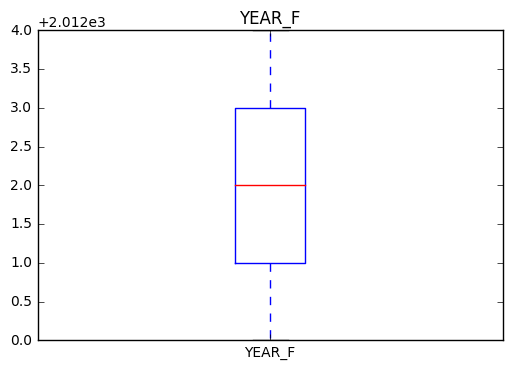

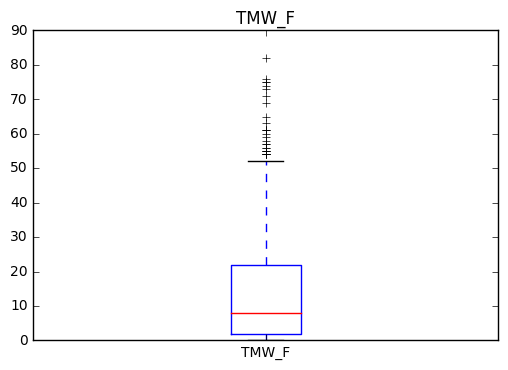

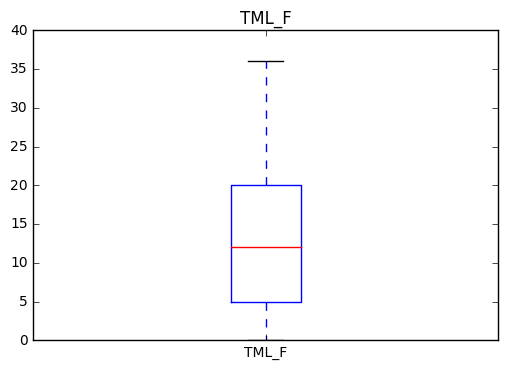

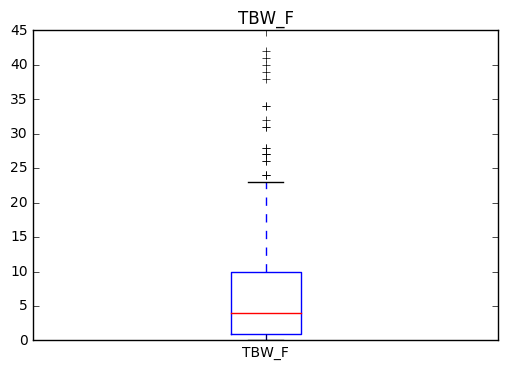

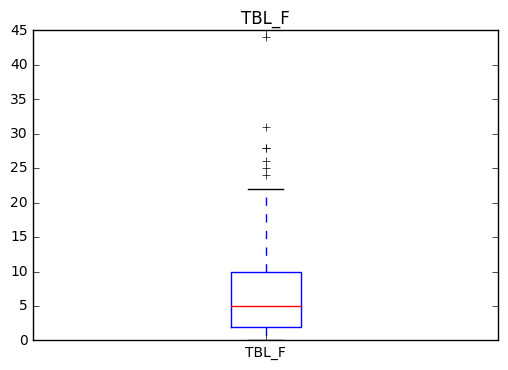

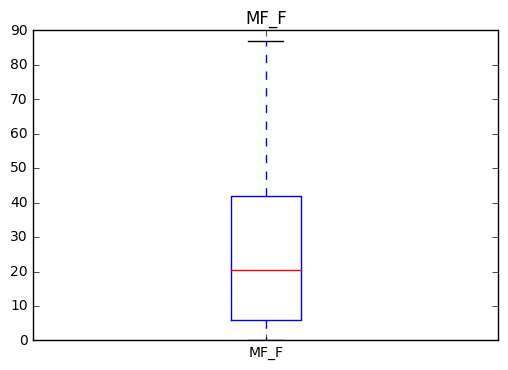

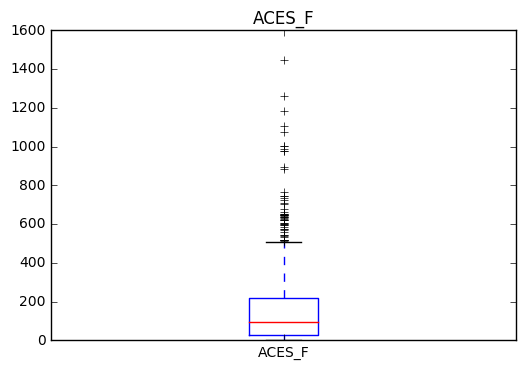

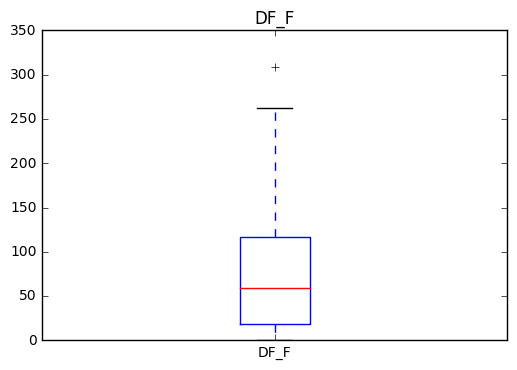

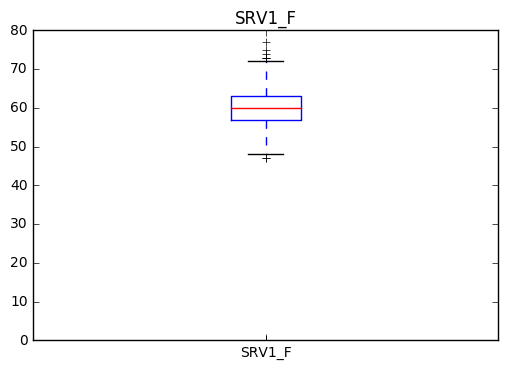

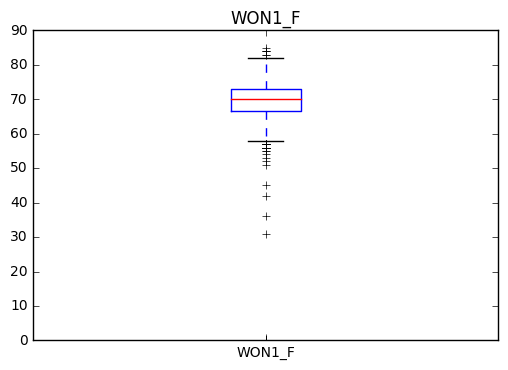

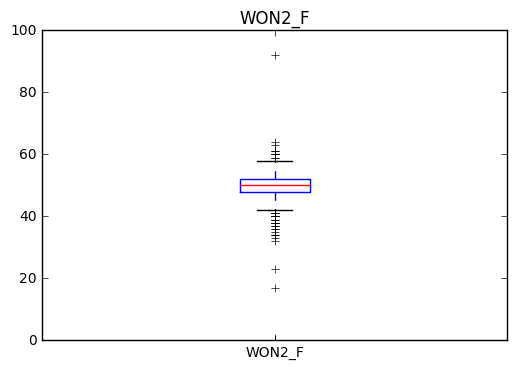

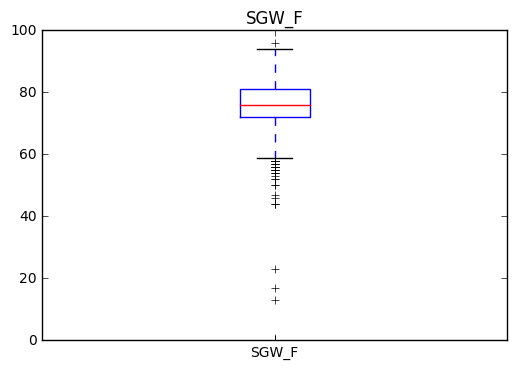

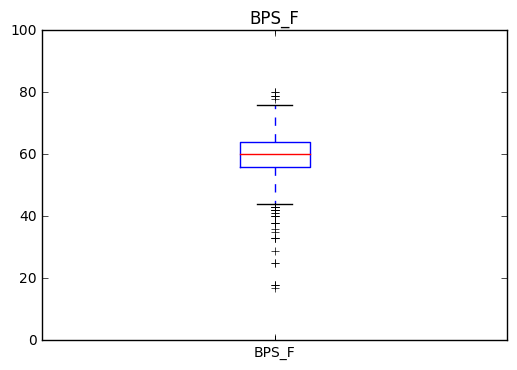

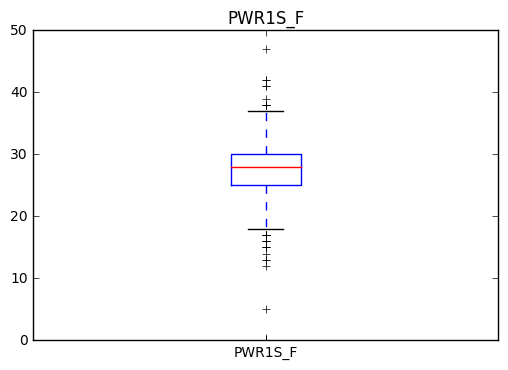

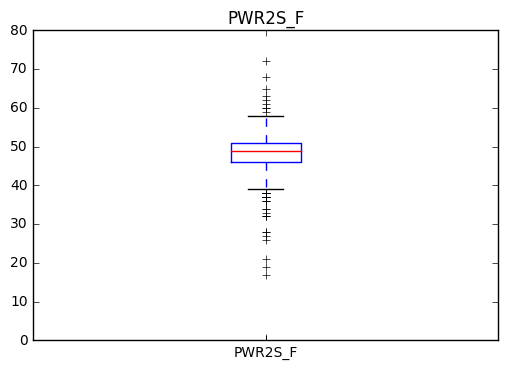

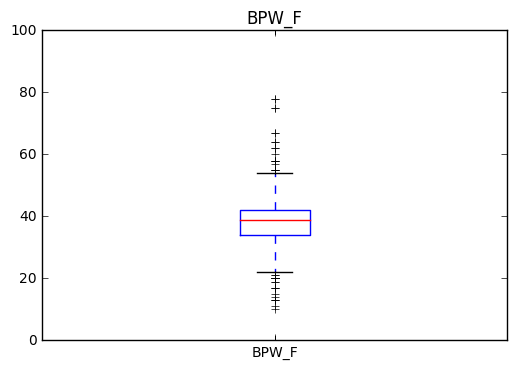

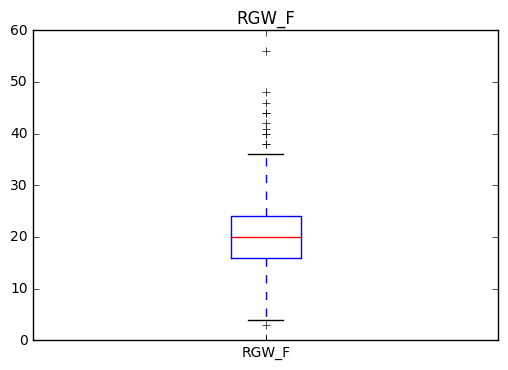

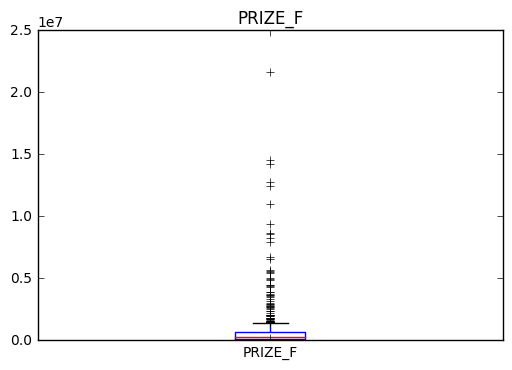

In [7]:
columns_facts = [u'YEAR_F', u'TMW_F', u'TML_F', u'TBW_F', u'TBL_F', u'MF_F',
       u'ACES_F', u'DF_F', u'SRV1_F', u'WON1_F', u'WON2_F', u'SGW_F', u'BPS_F',
       u'PWR1S_F', u'PWR2S_F', u'BPW_F', u'RGW_F', u'PRIZE_F']
plt.figure()
for key in columns_facts:
    facts_atp[key].plot(kind='box')
    plt.title(key)
    
    plt.show()

In [40]:
facts_atp[columns_facts].describe()

,YEAR_F,TMW_F,TML_F,TBW_F,TBL_F,MF_F,ACES_F,DF_F,SRV1_F,WON1_F,WON2_F,SGW_F,BPS_F,PWR1S_F,PWR2S_F,BPW_F,RGW_F,PRIZE_F
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,9.480000e+02
mean,2014.001055,13.894515,12.784810,6.236287,6.084388,25.417722,160.800633,73.713080,59.417722,68.514768,48.869198,74.072785,58.239451,27.135021,47.177215,37.759494,19.520042,6.896413e+05
std,1.410100,14.883690,8.617662,6.712930,5.429519,21.073126,190.260748,61.916403,9.428583,11.058871,8.160338,13.547834,11.419737,5.588372,8.233795,10.891088,7.199570,1.499662e+06
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.844100e+04
25%,2013.000000,2.000000,5.000000,1.000000,2.000000,6.000000,28.000000,19.000000,57.000000,66.750000,48.000000,72.000000,56.000000,25.000000,46.000000,34.000000,16.000000,1.367368e+05
50%,2014.000000,8.000000,12.000000,4.000000,5.000000,20.500000,97.000000,59.000000,60.000000,70.000000,50.000000,76.000000,60.000000,28.000000,49.000000,39.000000,20.000000,3.110930e+05
75%,2015.000000,22.000000,20.000000,10.000000,10.000000,42.000000,220.000000,117.000000,63.000000,73.000000,52.000000,81.000000,64.000000,30.000000,51.000000,42.000000,24.000000,6.644490e+05
max,2016.000000,82.000000,36.000000,42.000000,44.000000,87.000000,1447.000000,309.000000,77.000000,85.000000,92.000000,96.000000,100.000000,47.000000,72.000000,100.000000,56.000000,2.164614e+07


## games_atp.csv 

In [44]:
games_atp.head(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
0,17613,18854,8887,4,7-6(8) 3-6 10-7,2012-01-31
1,25192,25191,8888,4,6-3 6-2,2012-01-31


In [8]:
games_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 6 columns):
ID1_G       84485 non-null int64
ID2_G       84485 non-null int64
ID_T_G      84485 non-null int64
ID_R_G      84485 non-null int64
RESULT_G    84485 non-null object
DATE_G      84485 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.9+ MB


La table games_atp.csv correspond à notre ensemble d'entrainement pour notre modèle prédictif. Il est constitué de 84485 matchs avec pour chaque match : 2 identifiants de joueur (ID1 & ID2), Identifiant du tournoi, Identifiant du round, le résultat et la date.

Pour chaque match l'identifiant 1 est le vainqueur. 

## games_atp_public.csv

In [43]:
games_atp_public.head(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,DATE_G
0,30589,54796,13296,4,2016-08-01
1,54409,24429,13296,4,2016-08-01


In [10]:
games_atp_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 5 columns):
ID1_G     7608 non-null int64
ID2_G     7608 non-null int64
ID_T_G    7608 non-null int64
ID_R_G    7608 non-null int64
DATE_G    7608 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 297.3 KB


Parrallèlement à la table précedente, cette ensemble permettra de tester le modèle. Il faut ici prédire les résultats des matchs.

## players_atp.csv 

In [42]:
players_atp.head(2)

,ID_P,NAME_P,DATE_P,COUNTRY_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,...,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
0,1,Gustavo Kuerten,1976-09-10 00:00:00,BRA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Marat Safin,1980-01-27 00:00:00,RUS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
players_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55562 entries, 0 to 55561
Data columns (total 23 columns):
ID_P             55562 non-null int64
NAME_P           55562 non-null object
DATE_P           26722 non-null object
COUNTRY_P        27342 non-null object
RANK_P           900 non-null float64
PROGRESS_P       900 non-null float64
POINT_P          900 non-null float64
HARDPOINT_P      900 non-null float64
HARDTOUR_P       900 non-null float64
CLAYPOINT_P      900 non-null float64
CLAYTOUR_P       900 non-null float64
GRASSPOINT_P     900 non-null float64
GRASSTOUR_P      900 non-null float64
CARPETPOINT_P    900 non-null float64
CARPETTOUR_P     900 non-null float64
PRIZE_P          1733 non-null float64
CH_P             100 non-null float64
DR_P             900 non-null float64
DP_P             900 non-null float64
DO_P             900 non-null float64
IHARDPOINT_P     900 non-null float64
IHARDTOUR_P      900 non-null float64
ITF_ID           15606 non-null float64
dtypes: flo

La table players_atp correspond à un mapping des identifiants des joueurs avec leur noms.

## rating_atp.csv 

In [12]:
ratings_atp.head(10)

,DATE_R,ID_P_R,POINT_R,POS_R
0,2012-01-02,5992,13630,1
1,2012-01-02,677,9595,2
2,2012-01-02,19,8170,3
3,2012-01-02,1075,7380,4
4,2012-01-02,673,4925,5
5,2012-01-02,3985,4335,6
6,2012-01-02,831,3700,7
7,2012-01-02,553,2965,8
8,2012-01-02,728,2595,9
9,2012-01-02,4045,2380,10


In [49]:
ratings_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173400 entries, 0 to 173399
Data columns (total 4 columns):
DATE_R     173400 non-null datetime64[ns]
ID_P_R     173400 non-null int64
POINT_R    173400 non-null int64
POS_R      173400 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 MB


La table ratings_atp contient le classement ATP du circuit. En effet, la table contient 173400 car le classement ATP est renouvellé à chaque début de tournoi. Ainsi, cette table contient le classement ATP toutes les deux semaines. Avec les points attribués. 

## round.csv 

In [50]:
rounds

,ID_R,NAME_R
0,1,Pre-q
1,2,q-Second
2,3,Qualifying
3,4,First
4,5,Second
5,6,Third
6,7,Fourth
7,8,Robin
8,9,1/4
9,10,1/2


## tours.csv 

In [53]:
tours_atp.head(3)

,ID_T,NAME_T,ID_C_T,DATE_T,RANK_T,LINK_T,COUNTRY_T,PRIZE_T,RATING_T,URL_T,...,SITE_T,RACE_T,ENTRY_T,SINGLES_T,DOUBLES_T,TIER_T,RESERVE_INT_T,RESERVE_CHAR_T,LIVE_T,RESULT_T
0,1,Australian Men's Hardcourt Championships - Ade...,1,1997-01-01 00:00:00,2,1600.0,AUS,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Qatar Mobil Open - Doha,1,1997-01-01 00:00:00,2,1601.0,QAT,$600K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BellSouth Open - Auckland,1,1997-01-06 00:00:00,2,1603.0,NZL,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
tours_atp.info()
tours_atp.NAME_T.unique().shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13243 entries, 0 to 13242
Data columns (total 22 columns):
ID_T              13243 non-null int64
NAME_T            13243 non-null object
ID_C_T            13243 non-null int64
DATE_T            13243 non-null object
RANK_T            13243 non-null int64
LINK_T            4678 non-null float64
COUNTRY_T         13243 non-null object
PRIZE_T           11810 non-null object
RATING_T          884 non-null float64
URL_T             2632 non-null object
LATITUDE_T        5557 non-null float64
LONGITUDE_T       5557 non-null float64
SITE_T            2188 non-null float64
RACE_T            1983 non-null float64
ENTRY_T           1985 non-null float64
SINGLES_T         769 non-null float64
DOUBLES_T         768 non-null float64
TIER_T            1422 non-null object
RESERVE_INT_T     0 non-null float64
RESERVE_CHAR_T    4815 non-null object
LIVE_T            0 non-null float64
RESULT_T          179 non-null float64
dtypes: float64(12), int64(

array(["Australian Men's Hardcourt Championships - Adelaide",
       'Qatar Mobil Open - Doha', 'BellSouth Open - Auckland', ...,
       'Hungary F7', 'Davis Cup, Group I, PO, DOM-COL 1-4', 'Hungary F8'], dtype=object)

tours_atp contient la description des tournoi du circuit ATP. L'identifiant d'un tournoi est associé à un nom et une date!

## stats_atp.csv 

In [18]:
stat_atp.head()

,ID1,ID2,ID_T,ID_R,FS_1,FSOF_1,ACES_1,DF_1,UE_1,W1S_1,...,NAOF_2,TPW_2,FAST_2,A1S_2,A2S_2,RPW_1,RPWOF_1,RPW_2,RPWOF_2,MT
0,401,921,2205,1,52.0,91.0,1.0,2.0,25.0,37.0,...,32.0,83.0,NaN,NaN,NaN,31.0,78.0,36.0,91.0,NaN
1,65,706,2205,1,37.0,71.0,3.0,6.0,28.0,27.0,...,10.0,62.0,NaN,NaN,NaN,31.0,67.0,26.0,71.0,NaN
2,77,406,2205,1,32.0,50.0,4.0,0.0,7.0,26.0,...,26.0,46.0,NaN,NaN,NaN,23.0,58.0,11.0,50.0,NaN
3,840,666,2205,2,50.0,75.0,4.0,2.0,31.0,29.0,...,29.0,80.0,NaN,NaN,NaN,38.0,86.0,32.0,75.0,NaN
4,831,880,2205,2,49.0,79.0,11.0,5.0,43.0,37.0,...,11.0,73.0,NaN,NaN,NaN,34.0,81.0,26.0,79.0,NaN


In [11]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124273 entries, 0 to 124272
Data columns (total 45 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124269 non-null float64
FSOF_1     124268 non-null float64
ACES_1     122636 non-null float64
DF_1       123790 non-null float64
UE_1       11621 non-null float64
W1S_1      124272 non-null float64
W1SOF_1    124272 non-null float64
W2S_1      124269 non-null float64
W2SOF_1    124269 non-null float64
WIS_1      11376 non-null float64
BP_1       124240 non-null float64
BPOF_1     124240 non-null float64
NA_1       8079 non-null float64
NAOF_1     8079 non-null float64
TPW_1      123937 non-null float64
FAST_1     4449 non-null float64
A1S_1      4370 non-null float64
A2S_1      4362 non-null float64
FS_2       124269 non-null float64
FSOF_2     124268 non-null float64
ACES_2     122627 non-null float64
DF_2       123808 non-null float64

Stats_atp contient les statistiques des matchs. Chaque match a été gagné par l'identifiant 1. Voici la liste des attributs de chaques match:

    ID1 : L’identifiant du joueur qui a gagné le match
    ID2 : L’identifiant du joueur qui a perdu le match
    ID_T : L’identifiant du tournoi (voir tours_atp)
    ID_R : L’identfiant du extit{round} dans le tournoi (voir rounds)
    FS_1 : Nombre de premiers services réussis (joueur 1)
    FS_OF1 : Nombre de premiers services (joueur 1)
    ACES_1 : Aces (joueur 1)
    DF_1 : Double Fautes (joueur 1)
    UE_1 : textit{Unforced errors} (erreurs directes ?)
    W1S_1: Nombre de points gagnés sur premier service
    W1SOF_1: Nombre de points joués sur premier service
    W2S_1: Nombre de points gagnés sur second service
    W2SOF_1: Nombre de points joués sur second service
    WIS_1 : Nombre de points gagnés en tout
    BP_1 : Nombre de balles de break gagnées
    BPOF_1 : Nombre de balles de break obtenues
    RPW_1 : Nombre de points gagnés
    RPW_OF1 : Nombre de points jouées
    .._2 : Les mêmes pour le joueur 2

Cette table sera énormément utilisé pour créer nos features. Nous allons donc les examiner en détails.


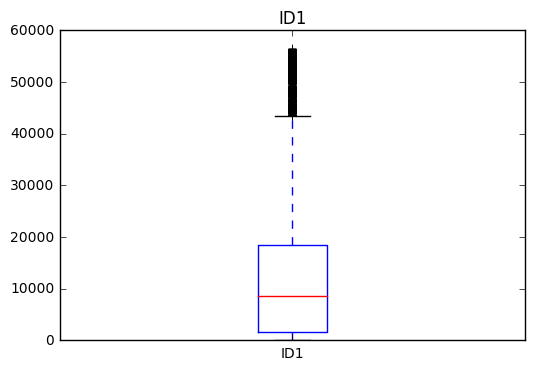

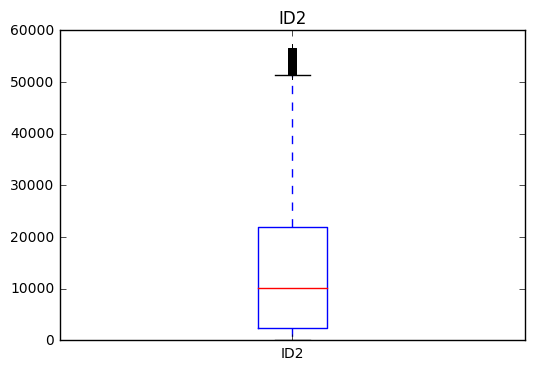

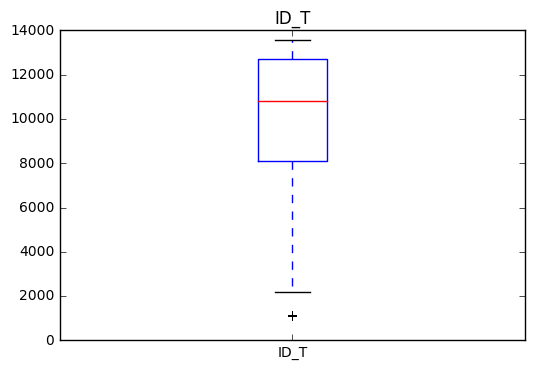

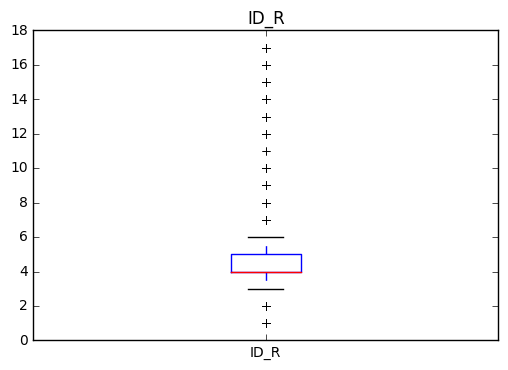

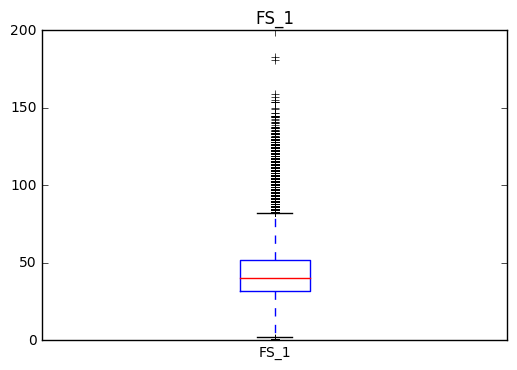

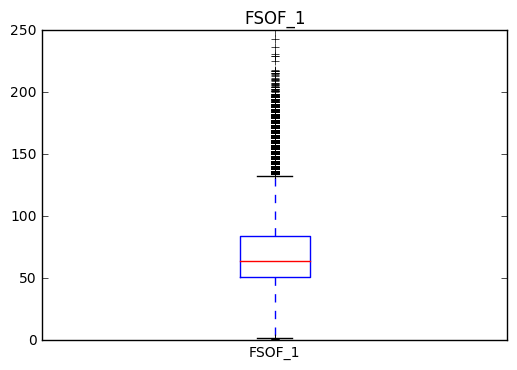

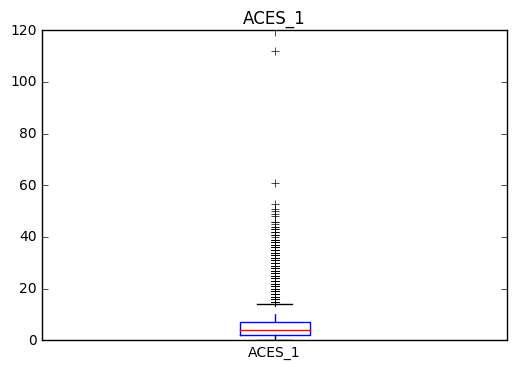

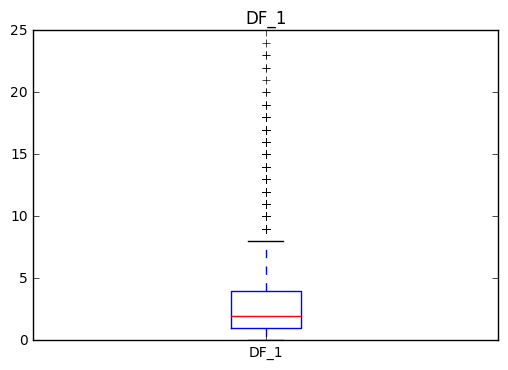

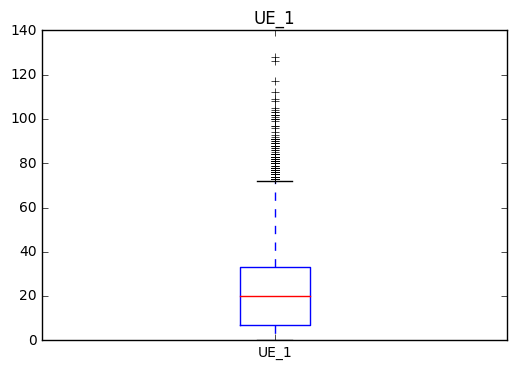

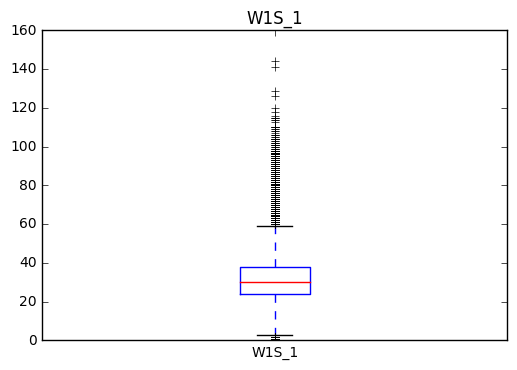

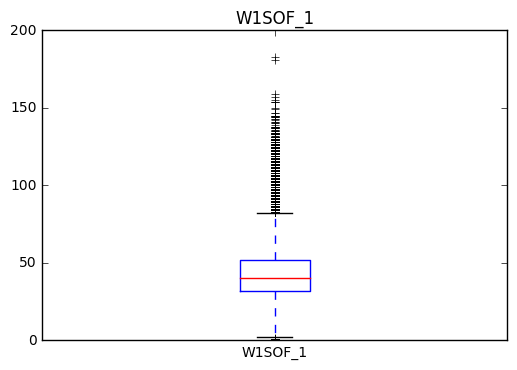

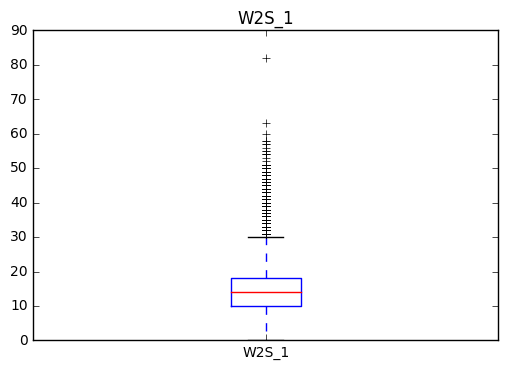

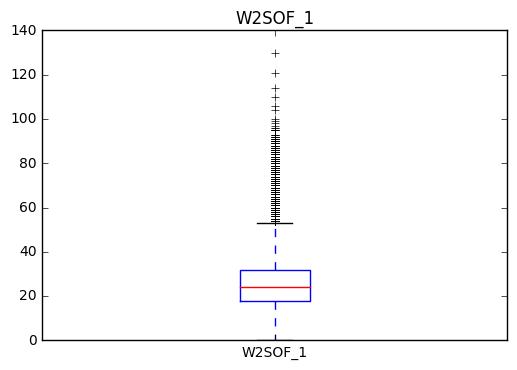

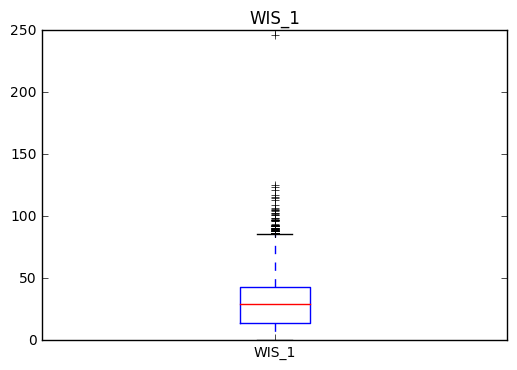

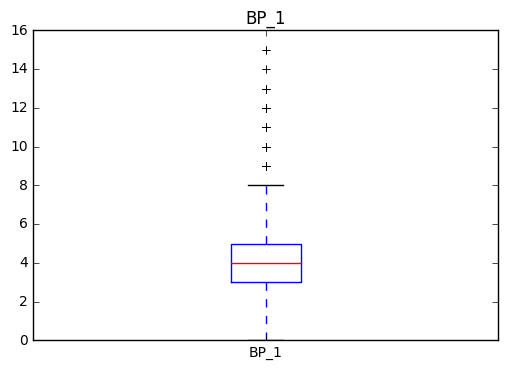

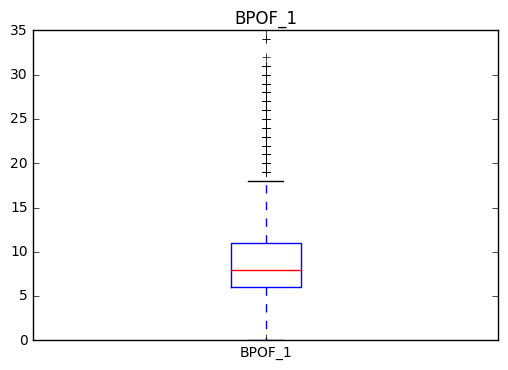

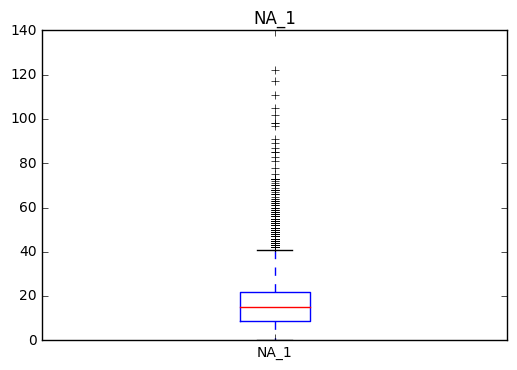

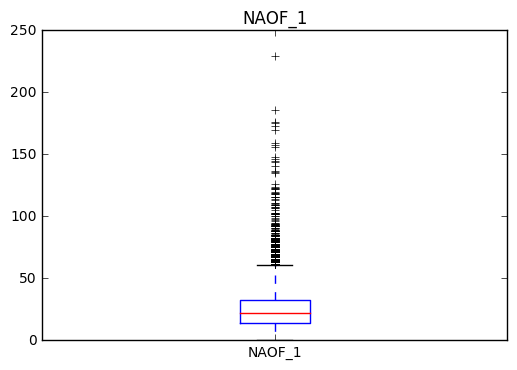

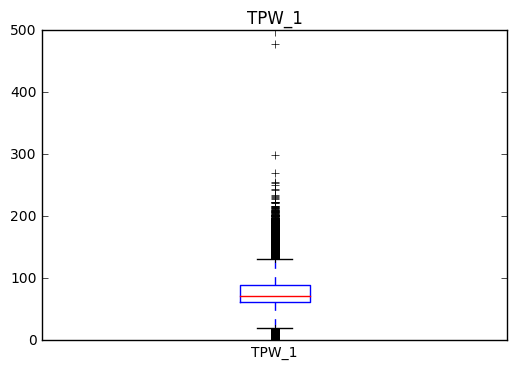

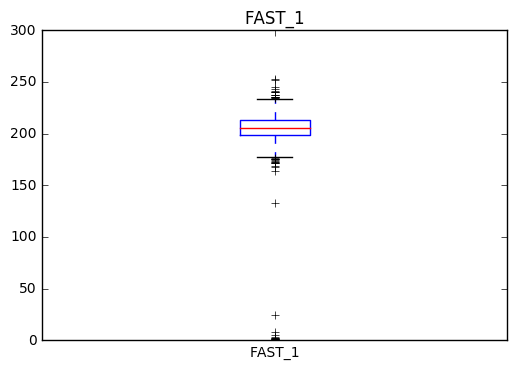

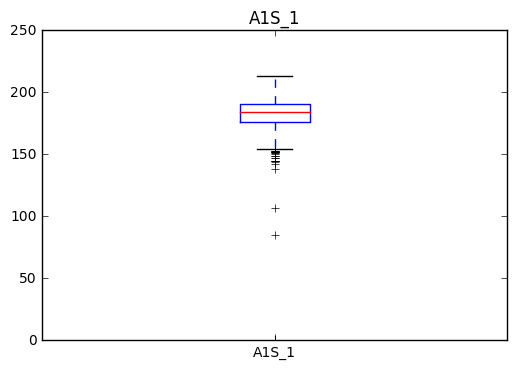

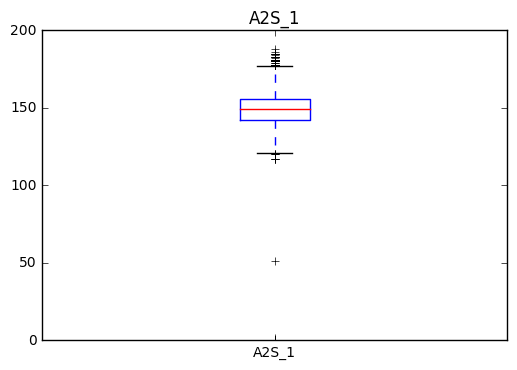

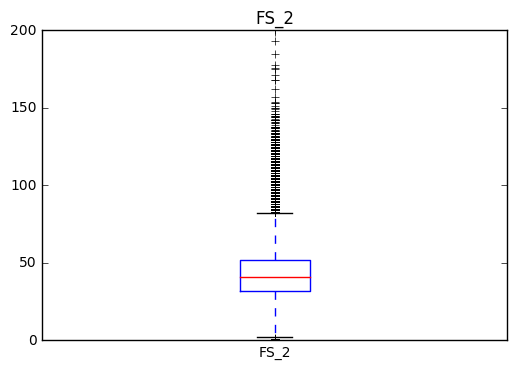

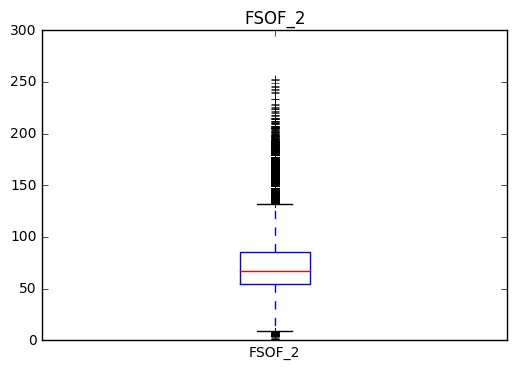

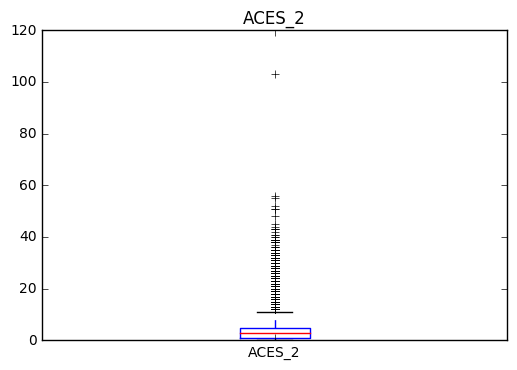

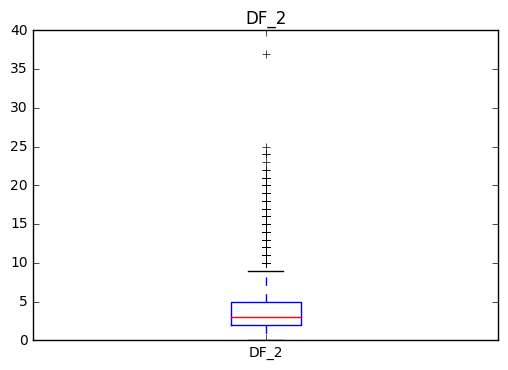

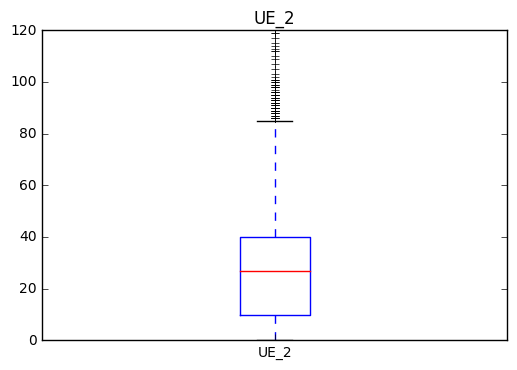

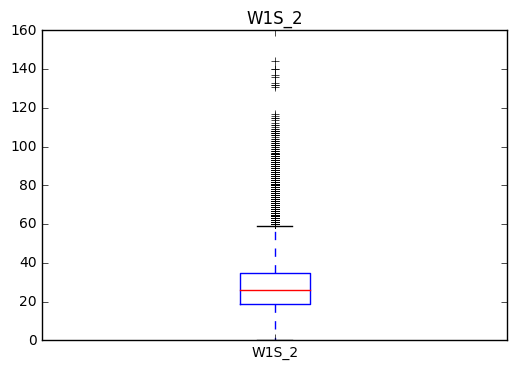

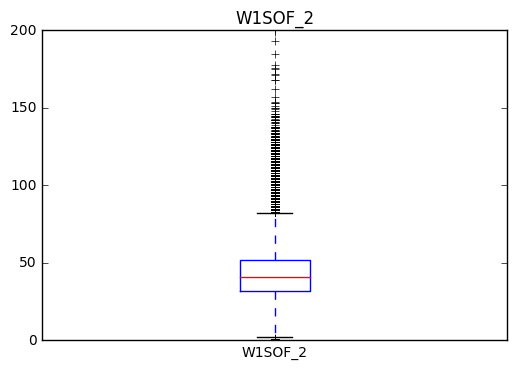

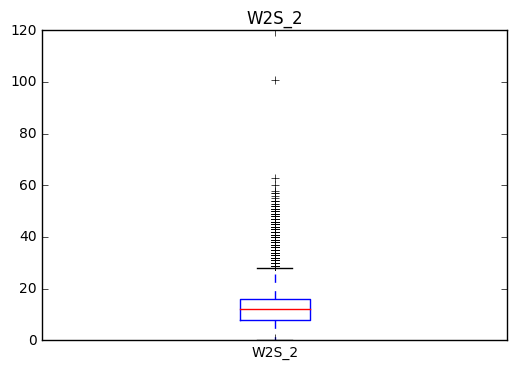

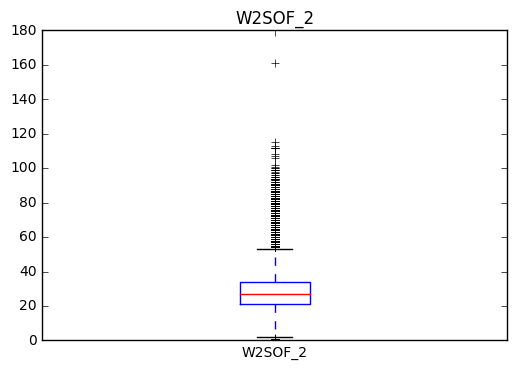

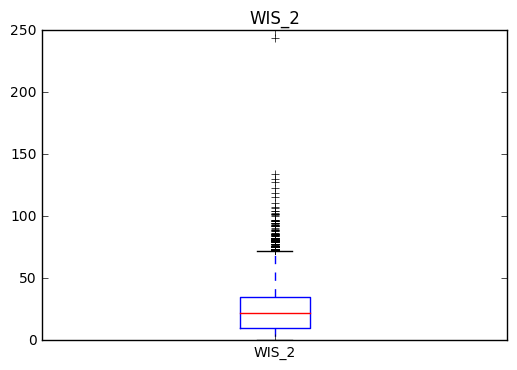

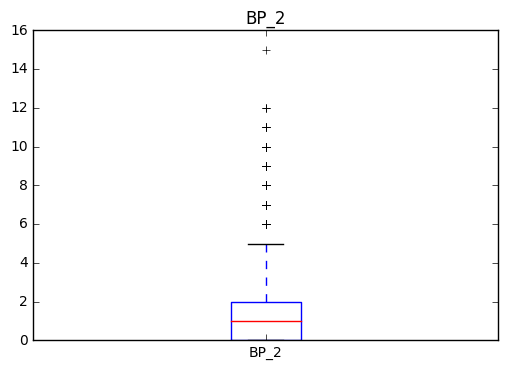

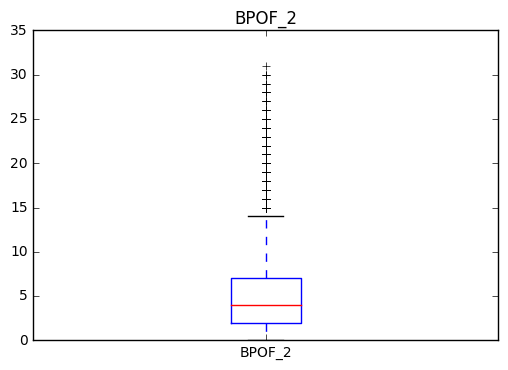

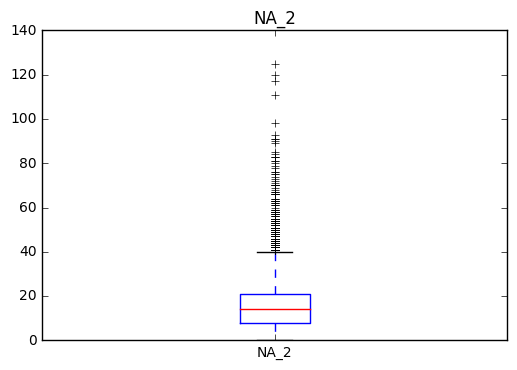

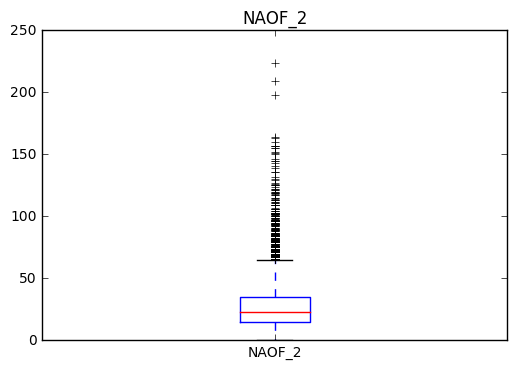

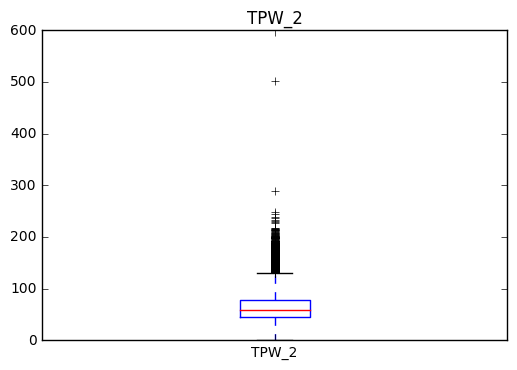

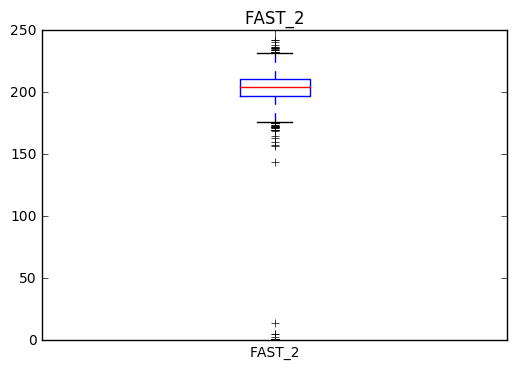

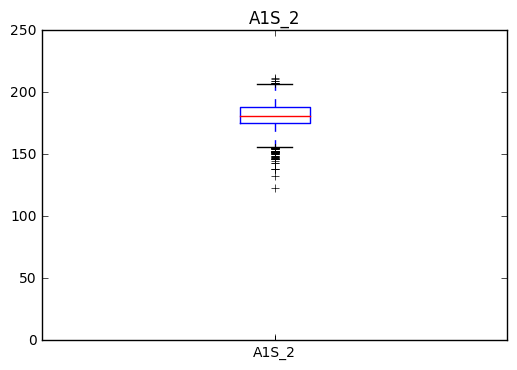

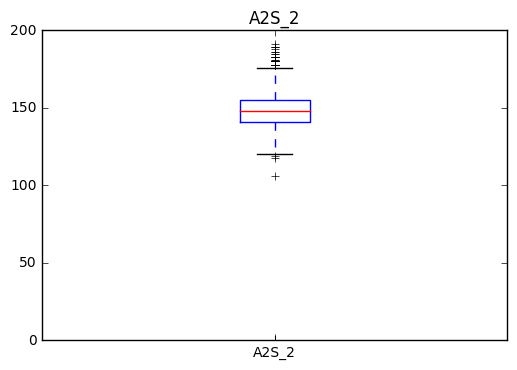

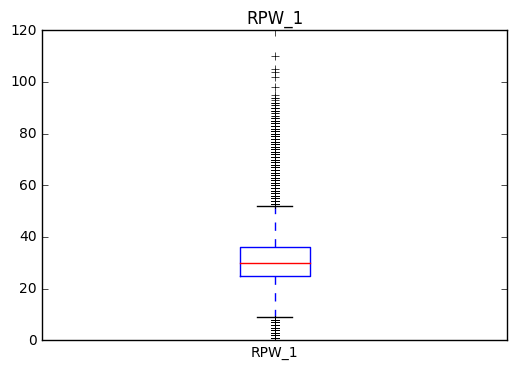

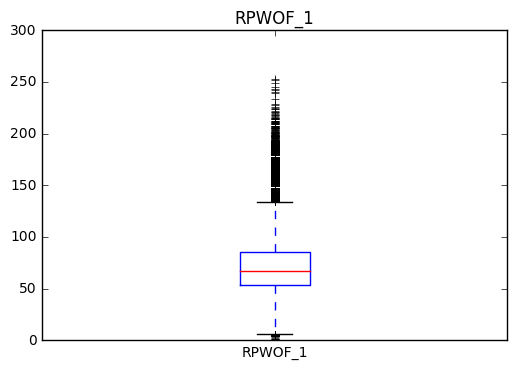

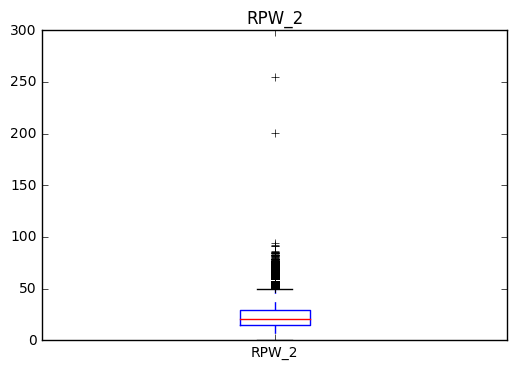

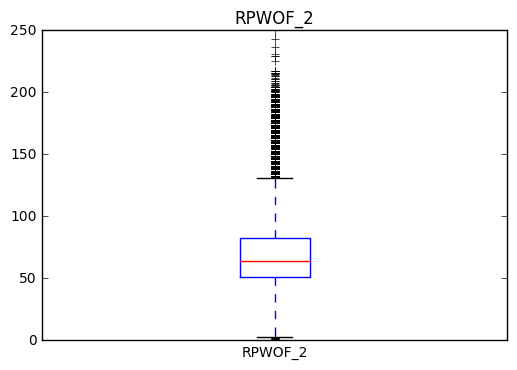

TypeError: Empty 'DataFrame': no numeric data to plot

In [15]:
columns_stats = stat_atp.columns
plt.figure()
for key in columns_stats:
    if key != 
    stat_atp[key].plot(kind='box')
    plt.title(key)
    
    plt.show()